# 02-Stock-Forecasting

![](https://images.unsplash.com/photo-1468254095679-bbcba94a7066?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1049&q=80)

Photo by [Rick Tap](https://unsplash.com/photos/uJhgEXPqSPk)

In this exercise, you will use a RNN to predict the stock market evolution.

Stock market can be seen as a sequence of values (each day is a step), and thus you can predict the closing value of the next day, knowing the past.

First, load the dataset `all_stocks_5yr.csv`, which contains all the stock market values over 5 years for many companies. Then explore it.

In [1]:
# TODO: Load the dataset and explore it
### STRIP_START ###
import pandas as pd

df = pd.read_csv('all_stocks_5yr.csv')

df.head()
### STRIP_END ###

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
# TODO: Load the dataset and explore it
### STRIP_START ###
print("NA:", df.isna().sum())
print("duplicates:", df.duplicated().sum())
### STRIP_END ###

NA: date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64
duplicates: 0


The column name represent the name of the stock, for example `'AAL'` stands for American Airlines.

Select a name for which you have many information (i.e. the more lines), and plot the `close` value of this stock as a function of time. This represents the stock market evolution.

In [14]:
# TODO: Plot the stock market evolution of a given name
### STRIP_START ###
print(df['Name'].value_counts()[:10])
print('PFE is one of the names having the most information')
### STRIP_END ###

NWL    1259
BWA    1259
PFE    1259
SYY    1259
F      1259
EIX    1259
AFL    1259
SIG    1259
AMT    1259
HBI    1259
Name: Name, dtype: int64
PFE is one of the names having the most information


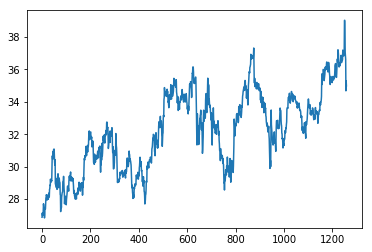

In [15]:
# TODO: Plot the stock market evolution of a given name
### STRIP_START ###
import numpy as np
import matplotlib.pyplot as plt

data = df[df['Name']=="PFE"]

plt.plot(np.arange(len(data)), data['close'])
plt.show()
### STRIP_END ###

We will now try to make a prediction of this close value of a day, based on all the features (`open`, `high`, `low`, `close`, `volume`) of the 30 past days.

Before doing so, we need to create the (X, y) dataset!

Let's consider your action `Name` has 100 lines.

The `X` values should contain, in each line, a table of 30 days and 5 features (`open`, `high`, `low`, `close`, `volume`). So that the final `X` array will have the shape `(69, 30, 5)`.

This `y` values should be the `close` values of the days 31 to last (indeed, `y` can not contain the 30 first days, since we need 30 days of X to predict before). So the final `y` array will have the shape `(69, 1)` (or equivalently `(69,)`).

In [27]:
# TODO: compute X and y
### STRIP_START ###
def processData(data, past):
    X,Y = [],[]
    for i in range(len(data)-past-1):
        X.append(data.iloc[i:i+past, 1:6].values)
        Y.append(data.iloc[i+past, 4])

    return np.array(X),np.array(Y)


lookback = 30

X, y = processData(data, lookback)
X.shape, y.shape
### STRIP_END ###

((1228, 30, 5), (1228,))

You already know the next step: prepare and split the data. Be careful, we want to keep the order in sequence...

In [29]:
# TODO: Prepare and split the data
### STRIP_START ###
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, shuffle=False)
### STRIP_END ###

Now that the data is ready, build a RNN model (for example begin with 2 layers of 16 units), compile it and train it.

In [30]:
# TODO: Train your RNN model
### STRIP_START ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout

def my_RNN():

    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=True, input_shape=(lookback,5)))
    model.add(SimpleRNN(units=32, return_sequences=True))
    model.add(SimpleRNN(units=32, return_sequences=False))

    model.add(Dense(units=1, activation='linear'))

    return model

model = my_RNN()

model.compile(optimizer='adam',
              loss='mean_squared_error')


model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500, batch_size=64)
### STRIP_END ###

Train on 982 samples, validate on 246 samples
Epoch 1/500
982/982 [==============================] - 1s 961us/sample - loss: 992.7456 - val_loss: 1313.9386
Epoch 2/500
982/982 [==============================] - 0s 194us/sample - loss: 893.4418 - val_loss: 1056.2714
Epoch 3/500
982/982 [==============================] - 0s 224us/sample - loss: 692.7189 - val_loss: 763.4848
Epoch 4/500
982/982 [==============================] - 0s 214us/sample - loss: 569.6831 - val_loss: 671.1490
Epoch 5/500
982/982 [==============================] - 0s 195us/sample - loss: 512.3845 - val_loss: 624.2474
Epoch 6/500
982/982 [==============================] - 0s 192us/sample - loss: 477.4933 - val_loss: 589.1631
Epoch 7/500
982/982 [==============================] - 0s 192us/sample - loss: 448.5352 - val_loss: 558.3298
Epoch 8/500
982/982 [==============================] - 0s 194us/sample - loss: 422.6560 - val_loss: 530.1357
Epoch 9/500
982/982 [==============================] - 0s 187us/sample - loss: 3

Epoch 76/500
982/982 [==============================] - 0s 232us/sample - loss: 6.5301 - val_loss: 18.6634
Epoch 77/500
982/982 [==============================] - 0s 235us/sample - loss: 6.3476 - val_loss: 18.0906
Epoch 78/500
982/982 [==============================] - 0s 228us/sample - loss: 6.1896 - val_loss: 17.5325
Epoch 79/500
982/982 [==============================] - 0s 235us/sample - loss: 6.0422 - val_loss: 17.0361
Epoch 80/500
982/982 [==============================] - 0s 231us/sample - loss: 5.9163 - val_loss: 16.5558
Epoch 81/500
982/982 [==============================] - 0s 216us/sample - loss: 5.8018 - val_loss: 16.1163
Epoch 82/500
982/982 [==============================] - 0s 233us/sample - loss: 5.7010 - val_loss: 15.7065
Epoch 83/500
982/982 [==============================] - 0s 232us/sample - loss: 5.6108 - val_loss: 15.3350
Epoch 84/500
982/982 [==============================] - 0s 233us/sample - loss: 5.5356 - val_loss: 14.9701
Epoch 85/500
982/982 [===============

982/982 [==============================] - 0s 250us/sample - loss: 6.9750 - val_loss: 19.8758
Epoch 152/500
982/982 [==============================] - 0s 238us/sample - loss: 6.6816 - val_loss: 19.0393
Epoch 153/500
982/982 [==============================] - 0s 292us/sample - loss: 6.4345 - val_loss: 18.2647
Epoch 154/500
982/982 [==============================] - 0s 504us/sample - loss: 6.2246 - val_loss: 17.5476
Epoch 155/500
982/982 [==============================] - 0s 351us/sample - loss: 6.0404 - val_loss: 16.9091
Epoch 156/500
982/982 [==============================] - 0s 233us/sample - loss: 5.8832 - val_loss: 16.3241
Epoch 157/500
982/982 [==============================] - 0s 240us/sample - loss: 5.7532 - val_loss: 15.7928
Epoch 158/500
982/982 [==============================] - 0s 350us/sample - loss: 5.6385 - val_loss: 15.3042
Epoch 159/500
982/982 [==============================] - 0s 253us/sample - loss: 5.5374 - val_loss: 14.8736
Epoch 160/500
982/982 [===================

982/982 [==============================] - 0s 267us/sample - loss: 1.4049 - val_loss: 4.4710
Epoch 228/500
982/982 [==============================] - 0s 230us/sample - loss: 1.3648 - val_loss: 4.3592
Epoch 229/500
982/982 [==============================] - 0s 219us/sample - loss: 1.3295 - val_loss: 4.2569
Epoch 230/500
982/982 [==============================] - 0s 261us/sample - loss: 1.2976 - val_loss: 4.1470
Epoch 231/500
982/982 [==============================] - 0s 394us/sample - loss: 1.2690 - val_loss: 4.0573
Epoch 232/500
982/982 [==============================] - 0s 339us/sample - loss: 1.2427 - val_loss: 3.9852
Epoch 233/500
982/982 [==============================] - 0s 237us/sample - loss: 1.2200 - val_loss: 3.8942
Epoch 234/500
982/982 [==============================] - 0s 221us/sample - loss: 1.1983 - val_loss: 3.8281
Epoch 235/500
982/982 [==============================] - 0s 225us/sample - loss: 1.1831 - val_loss: 3.7490
Epoch 236/500
982/982 [============================

982/982 [==============================] - 0s 276us/sample - loss: 0.8685 - val_loss: 2.5864
Epoch 304/500
982/982 [==============================] - 0s 349us/sample - loss: 0.8679 - val_loss: 2.5864
Epoch 305/500
982/982 [==============================] - 0s 260us/sample - loss: 0.8655 - val_loss: 2.5863
Epoch 306/500
982/982 [==============================] - 0s 229us/sample - loss: 0.8691 - val_loss: 2.5824
Epoch 307/500
982/982 [==============================] - 0s 231us/sample - loss: 0.8623 - val_loss: 2.5825
Epoch 308/500
982/982 [==============================] - 0s 224us/sample - loss: 0.8625 - val_loss: 2.5733
Epoch 309/500
982/982 [==============================] - 0s 234us/sample - loss: 0.8619 - val_loss: 2.5714
Epoch 310/500
982/982 [==============================] - 0s 237us/sample - loss: 0.8621 - val_loss: 2.5694
Epoch 311/500
982/982 [==============================] - 0s 320us/sample - loss: 0.8657 - val_loss: 2.5620
Epoch 312/500
982/982 [============================

982/982 [==============================] - 0s 257us/sample - loss: 0.3307 - val_loss: 1.2821
Epoch 380/500
982/982 [==============================] - 0s 242us/sample - loss: 0.3231 - val_loss: 1.2385
Epoch 381/500
982/982 [==============================] - 0s 237us/sample - loss: 0.3216 - val_loss: 1.1914
Epoch 382/500
982/982 [==============================] - 0s 232us/sample - loss: 0.3142 - val_loss: 1.1553
Epoch 383/500
982/982 [==============================] - 0s 245us/sample - loss: 0.3068 - val_loss: 1.1289
Epoch 384/500
982/982 [==============================] - 0s 229us/sample - loss: 0.3005 - val_loss: 1.0873
Epoch 385/500
982/982 [==============================] - 0s 316us/sample - loss: 0.2985 - val_loss: 1.0655
Epoch 386/500
982/982 [==============================] - 0s 287us/sample - loss: 0.2974 - val_loss: 1.0405
Epoch 387/500
982/982 [==============================] - 0s 250us/sample - loss: 0.2875 - val_loss: 1.0226
Epoch 388/500
982/982 [============================

982/982 [==============================] - 0s 243us/sample - loss: 0.2012 - val_loss: 0.4209
Epoch 456/500
982/982 [==============================] - 0s 234us/sample - loss: 0.1986 - val_loss: 0.4557
Epoch 457/500
982/982 [==============================] - 0s 237us/sample - loss: 0.1969 - val_loss: 0.4368
Epoch 458/500
982/982 [==============================] - 0s 243us/sample - loss: 0.1994 - val_loss: 0.4808
Epoch 459/500
982/982 [==============================] - 0s 268us/sample - loss: 0.2047 - val_loss: 0.4269
Epoch 460/500
982/982 [==============================] - 0s 238us/sample - loss: 0.1956 - val_loss: 0.4127
Epoch 461/500
982/982 [==============================] - 0s 232us/sample - loss: 0.2020 - val_loss: 0.3947
Epoch 462/500
982/982 [==============================] - 0s 252us/sample - loss: 0.1926 - val_loss: 0.3870
Epoch 463/500
982/982 [==============================] - 0s 251us/sample - loss: 0.1929 - val_loss: 0.4015
Epoch 464/500
982/982 [============================

Finally, plot the results: display on the same plot `y_train`, `y_test` and the prediction of `y_test`.

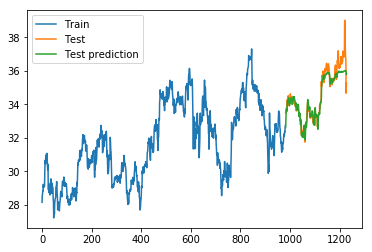

In [31]:
# TODO: Plot the results
### STRIP_START ###
plt.plot(np.arange(len(X_train)), y_train, label='Train')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
plt.legend()
plt.show()
### STRIP_END ###

You can try to improve your model by adding as features the information of other actions. As you know, in stock market, most of the information that impacts it is out of the stock market information itself.